In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pprint import pprint

import requests

from bs4 import BeautifulSoup

import json
import time
import copy
from collections import Counter
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
corpus = pd.read_csv("data/booksummaries/summaries&genres.csv")
corpus;

In [4]:
corpus['Summary'] = corpus['Summary'].str.lower()
docs = corpus['Summary']
docs;

In [5]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [6]:
vectorizer = TfidfVectorizer(stop_words=sw)

In [7]:
X = vectorizer.fit_transform(docs)
y = corpus['scifi?']

In [8]:
from sklearn.ensemble import RandomForestClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as SKMultinomialNB
import unicodedata
from nltk.corpus import stopwords

In [9]:
rf = RandomForestClassifier(max_depth=100, max_features = 'auto', oob_score=True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.775, stratify=y)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, oob_score=True)

In [11]:
TFIDF_train_score = rf.score(X_train, y_train)
TFIDF_test_score = rf.score(X_test, y_test)

In [12]:
print(TFIDF_train_score, TFIDF_test_score)

0.9719626168224299 0.845674740484429


Text(0.5, 0, 'Word Scores')

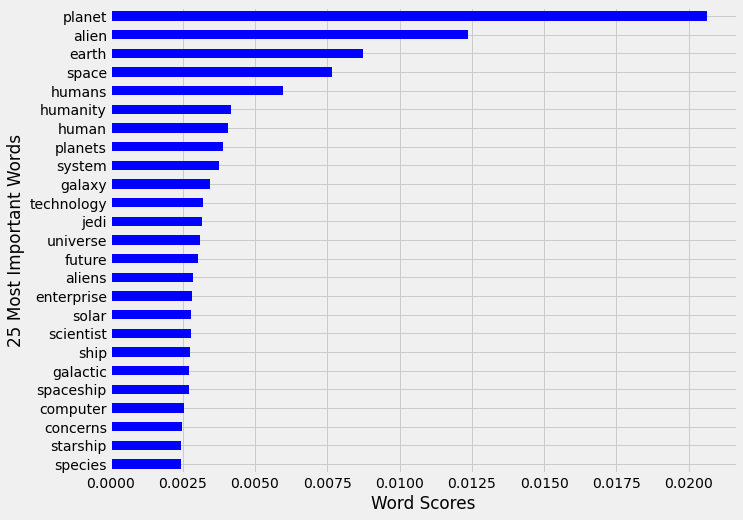

In [13]:
fig, ax = plt.subplots()
feat_scores = pd.Series(rf.feature_importances_, index=vectorizer.get_feature_names())
feat_scores = feat_scores.sort_values()
ax = feat_scores[-25:].plot(kind='barh',figsize=(10,8),color='b')
ax.set_ylabel('25 Most Important Words')
ax.set_xlabel('Word Scores')
# fig.savefig('/home/thomas/DSI_ii/cap_stones/DSI_CS3/images/body_scores.png',dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches='tight', pad_inches=0.2,
#         frameon=None, metadata=None)

In [14]:
count_vec = CountVectorizer(stop_words=sw, max_features=1000 )

In [15]:
X2 = count_vec.fit_transform(docs)
count_df = pd.DataFrame(X2.toarray(),columns=count_vec.get_feature_names())

In [16]:
count_df

,000,34,39,abandoned,ability,able,aboard,accept,accepts,accident,...,writes,writing,written,wrong,year,years,yet,york,young,younger
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,2,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,2,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12836,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12839,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [25]:
word_counts = count_df.sum(axis=0)
print(word_counts.sort_values(axis=0,ascending=False))

one           14939
time           9678
two            9037
also           9026
new            8570
              ...  
talking         534
guards          533
creature        533
plane           532
introduced      532
Length: 1000, dtype: int64
